Epoch 0 Loss 0.499446
Epoch 1000 Loss 0.434622
Epoch 2000 Loss 0.120161
Epoch 3000 Loss 0.066539
Epoch 4000 Loss 0.049543
Epoch 5000 Loss 0.040806
Epoch 6000 Loss 0.035337
Epoch 7000 Loss 0.031526
Epoch 8000 Loss 0.028687
Epoch 9000 Loss 0.026470

Prediction :
Inputs : [0 0] -> Output : 0.0182 -> Expected Output : 0 
Inputs : [0 1] -> Output : 0.9743 -> Expected Output : 1 
Inputs : [1 0] -> Output : 0.9745 -> Expected Output : 1 
Inputs : [1 1] -> Output : 0.0293 -> Expected Output : 0 


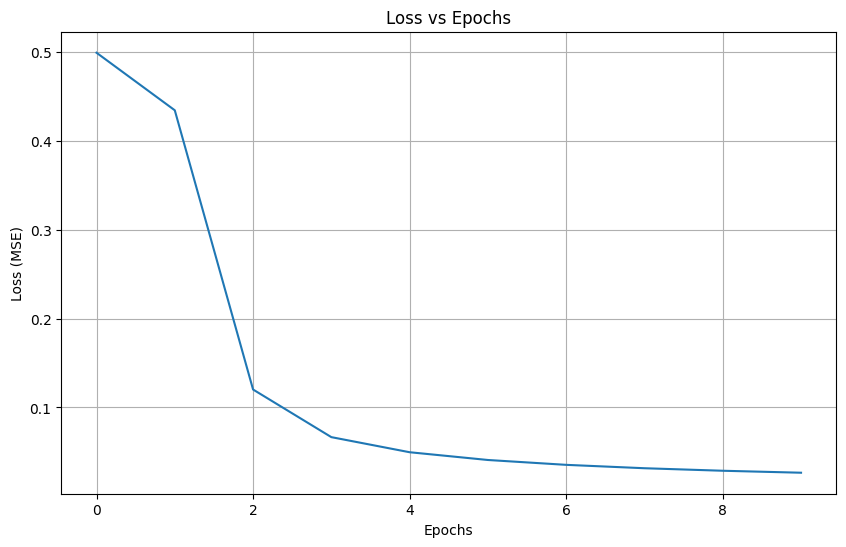

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR input and expected output
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

# Hyperparameters
epochs = 10000
lr = 0.2
inputN,hiddenN,outputN = 2,4,1

# Initialize weights with better scaling for proper convergence
hiddenW = np.random.randn(inputN,hiddenN) * np.sqrt(1.0/inputN)
hiddenB = np.zeros((1,hiddenN))
outputW = np.random.randn(hiddenN,outputN) * np.sqrt(1.0/hiddenN)
outputB = np.zeros((1,outputN))

# Store loss history for plotting
losses = []

for epoch in range(epochs):

    # Forward propagation
    hidden_layer_output = sigmoid(np.dot(inputs,hiddenW) + hiddenB)
    predicted_output = sigmoid(np.dot(hidden_layer_output,outputW) + outputB)

    # Calculate error
    error = expected_output - predicted_output

    # Backpropagation
    # Output layer error
    d_predicted_output = error * sigmoid_derivative(predicted_output)

        
    # Hidden layer error
    error_hidden_layer = d_predicted_output.dot(outputW.T) * sigmoid_derivative(hidden_layer_output)

   # Update weights and biases
    outputW += lr * hidden_layer_output.T.dot(d_predicted_output)
    outputB += lr * np.sum(d_predicted_output,axis=0,keepdims=True)

    hiddenW += lr * inputs.T.dot(error_hidden_layer)
    hiddenB += lr * np.sum(error_hidden_layer,axis=0,keepdims=True)
    
    if epoch % 1000 == 0 :
        loss = np.mean(np.abs(error))
        losses.append(loss)
        print(f"Epoch {epoch} Loss {loss:.6f}")

print("\nPrediction :")
for i in range(len(inputs)):
    print(f"Inputs : {inputs[i]} -> Output : {predicted_output[i][0]:.4f} -> Expected Output : {expected_output[i][0]} ")

# Plot loss over time
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()